In [22]:
import pandas as pd
#read tweets

folder = "../data/"
name_tweets = folder + "results.json"

with open(name_tweets, "r") as file:
    tweets_df = pd.read_json(file, orient='index')
print(len(tweets_df))
print(tweets_df.columns)

2348
Index(['predicted changes', 'text', 'timestamp', 'tweet', 'value change'], dtype='object')


In [2]:
tweets_df.sort_index(inplace=True)
tweets_df = tweets_df.reset_index(drop=True)
print(tweets_df["timestamp"][0])
print(len(tweets_df))
print(tweets_df["timestamp"][2347])

2015-06-14 21:18:23
2348
2018-09-25 16:45:36


In [3]:
#tweets=tweets_df.loc[tweets_df["timestamp"] < datetime.strptime('11/08/2016', '%m/%d/%Y')]
#print(tweets["timestamp"].values[0])
#print(tweets)
tweets=tweets_df

In [4]:
#tweets_dfx['difference'] = np.where(tweets["value change"]==tweets["predicted changes"], 1, 0)
tweets_dfxx=tweets.loc[tweets["value change"]==tweets["predicted changes"]]
print(len(tweets_dfxx))
tweets_dfxx

1058


,predicted changes,text,timestamp,tweet,value change
1,MEDPOS,https https i d vote twice for you if i could ...,2015-06-15 11:30:53,"""@FuturisticHub: @realDonaldTrump I'd vote twi...",MEDPOS
4,MEDPOS,live on periscope https,2015-06-15 14:55:16,LIVE on #Periscope https://t.co/H8lRtZBGEb,MEDPOS
10,MEDPOS,today i officially declared my candidacy for p...,2015-06-16 19:15:54,Today I officially declared my candidacy for P...,MEDPOS
12,BIGPOS,thank you sarah let s have pizza in new york s...,2015-06-17 14:53:22,Thank you Sarah--Let's have pizza in New York ...,BIGPOS
14,MEDNEG,the tragedy in south carolina is incomprehensi...,2015-06-18 16:58:49,The tragedy in South Carolina is incomprehensi...,MEDNEG
15,MEDNEG,watch my appearance on https joe great intervi...,2015-06-18 17:35:19,Watch my appearance on @Morning_Joe - great in...,MEDNEG
17,MEDPOS,has charles https ever apologized for being so...,2015-06-19 14:35:44,Has Charles @krauthammer ever apologized for b...,MEDPOS
18,MEDPOS,why did https beg me for a tweet endorsement w...,2015-06-20 01:03:05,Why did @DanaPerino beg me for a tweet (endors...,MEDPOS
33,MEDNEG,https s song rockin in the free world was just...,2015-06-24 21:04:19,".@Neilyoung’s song, “Rockin’ In The Free World...",MEDNEG
38,MEDPOS,https https only you can make it great again y...,2015-06-25 13:17:26,"""@nanaelaine7 @realDonaldTrump only YOU can ma...",MEDPOS


In [5]:
tweets_dfx=tweets.loc[tweets["value change"]!=tweets["predicted changes"]]
print(len(tweets_dfx))

#tweets_df1=tweets_dfx.loc[tweets_dfx["difference"]==0]

tweets_dfx=tweets_dfx.loc[(tweets_dfx["value change"].values=='BIGPOS') | (tweets_dfx["value change"].values=='MEDPOS') |
                         (tweets_dfx["value change"].values=='SMAPOS')]
tweets_df1=tweets_dfx.loc[(tweets_dfx["predicted changes"].values=='BIGPOS') | (tweets_dfx["predicted changes"].values=='MEDPOS') |
                         (tweets_dfx["predicted changes"].values=='SMAPOS')]
#tweets_df1.head()

tweets_dfx=tweets.loc[tweets["value change"]!=tweets["predicted changes"]]
print(len(tweets_dfx))

tweets_dfx=tweets_dfx.loc[(tweets_dfx["value change"].values=='BIGNEG') | (tweets_dfx["value change"].values=='MEDNEG') |
                         (tweets_dfx["value change"].values=='SMANEG')]
tweets_df2=tweets_dfx.loc[(tweets_dfx["predicted changes"].values=='BIGNEG') | (tweets_dfx["predicted changes"].values=='MEDNEG') |
                         (tweets_dfx["predicted changes"].values=='SMANEG')]

#classified2.head()
#print(len(tweets_dfx))

1290
1290


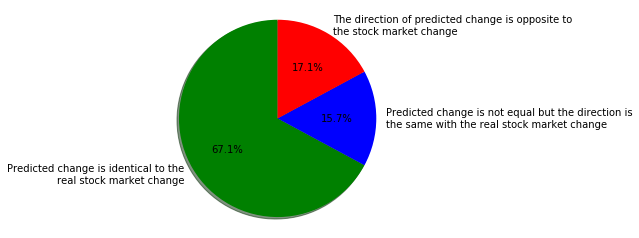

In [23]:
#modifying data
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
text1=textwrap.fill('Predicted change is identical to the real stock market change', width=40)
text2=textwrap.fill('Predicted change is not equal but the direction is the same with the real stock market change', width=50)
text3=textwrap.fill('The direction of predicted change is opposite to the stock market change', width=50)
labels = text1, text2, text3
colors  = ("green", "blue", "red")
sizes = [len(tweets_dfxx),len(tweets_df1), len(tweets_df2)]
#print(len(tweets_dfxx),len(tweets_df1), len(tweets_df2))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [21]:
import json
import pandas as pd
from pandas.io.json import json_normalize

folder = "../data/"
with open(folder + 'DJI-20years-daily-close.json', 'r') as myfile:
    data1=myfile.read()

obj = json.loads(data1)
orig_stock_df = pd.DataFrame.from_dict(obj, orient='index')

print(orig_stock_df["4. close"].index[0])
print(orig_stock_df.describe())

2000-01-03
           4. close
count   4725.000000
mean   13260.587012
std     4320.329855
min     6547.049800
25%    10368.610400
50%    11575.540000
75%    16072.540000
max    26828.390600


In [9]:
#tweets_df.sort_values("timestamp", ascending=False)
tweets_df.sort_index(inplace=True)
tweets_df = tweets_df.reset_index(drop=True)
print(tweets_df["timestamp"][0])
print(len(tweets_df))
print(tweets_df["timestamp"][2347])

2015-06-14 21:18:23
2348
2018-09-25 16:45:36


In [11]:
def store_time_stats(t):
    if t.year not in time_bins:
        time_bins[t.year] = 1
    else: time_bins[t.year] += 1
       
    ym = str(t.year) + "-" + str(t.month)
    if ym not in time_bins:
        time_bins[ym] = 1
    else: time_bins[ym] += 1

In [12]:
#combine the data
from datetime import datetime
from datetime import timedelta

classified = pd.DataFrame(columns=["date", "timestamp", "text", "tweet", "predicted changes", "orig changes", "orig stock", ], index=range(tweets_df.shape[0]))
print("classified shape:", classified.shape, "\ntweets_df shape:", tweets_df.shape)
time_bins = {}
latest_date_ind = 0

for i, t in enumerate(tweets_df["timestamp"]):    
    #count how many tweet per year and month
    store_time_stats(t)
    #fetch the change of the tweet's day and original stock rate 
    date_fix = t.date() + timedelta(days=1)
    date=str(date_fix)
    if not orig_stock_df[orig_stock_df.index == date].empty and t.date() > datetime.strptime('11/08/2016', '%m/%d/%Y').date():
        orig_stock=orig_stock_df.loc[date, "4. close"]

        #save to datastruct
        classified["date"][i] = date     
        classified["timestamp"][i] = t
        classified["text"][i] = tweets_df["text"][i]
        classified["tweet"][i] = tweets_df["tweet"][i]
        classified["predicted changes"][i] = tweets_df["predicted changes"][i]  
        classified["orig changes"][i] = tweets_df["value change"][i]        
        classified["orig stock"][i] = orig_stock
        


classified shape: (2348, 7) 
tweets_df shape: (2348, 5)


In [13]:
classified=classified[classified["text"].notnull()]
print(len(classified))

819


In [14]:
#descriptive statistics
import numpy as np
from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

#aggregate stock data for predicted and original classes
grouped_data = classified.groupby(['orig changes', 'predicted changes'])
grouped_data['orig stock'].describe().unstack()


count                                    unique         \
predicted changes BIGNEG BIGPOS MEDNEG MEDPOS SMANEG SMAPOS BIGNEG BIGPOS   
orig changes                                                                
BIGNEG              17.0    9.0   17.0   10.0    5.0    6.0    9.0    8.0   
BIGPOS               8.0   60.0   10.0   27.0   11.0    9.0    8.0   34.0   
MEDNEG              14.0   16.0  111.0   21.0   11.0   10.0   10.0   12.0   
MEDPOS              15.0   13.0   15.0  180.0   15.0   12.0   12.0   10.0   
SMANEG               9.0    5.0    6.0    5.0   82.0    4.0    6.0    5.0   
SMAPOS               NaN    5.0    7.0    7.0    NaN   67.0    NaN    4.0   

                                 ...           top                          \
predicted changes MEDNEG MEDPOS  ...        MEDNEG      MEDPOS      SMANEG   
orig changes                     ...                                         
BIGNEG              12.0    9.0  ...    25306.8301  24117.5898  21750.7305   
BIGPOS               7.0   22.0  ...    25414.0996  25558.7305  25414.0996   
MEDNEG              55.0   16.0  ...    22359.2305  21467.1406  24748.0703   
MEDPOS              12.0   82.0  ...    24283.1094  22775.3906  23940.6797   
SMANEG               5.0    3.0  ...    22761.0703  25964.8203  19804.7207   
SMAPOS               4.0    5.0  ...    25995.8691  26154.6699         NaN   

                                freq                                     
predicted changes      SMAPOS BIGNEG BIGPOS MEDNEG MEDPOS SMANEG SMAPOS  
orig changes                                                             
BIGNEG             23271.2793    4.0    2.0    2.0    2.0    1.0    1.0  
BIGPOS             25462.5801    1.0    5.0    2.0    2.0    2.0    2.0  
MEDNEG             21310.6602    2.0    2.0    9.0    2.0    2.0    2.0  
MEDPOS             20611.8594    2.0    2.0    2.0   11.0    2.0    2.0  
SMANEG             20914.6191    2.0    1.0    2.0    2.0    7.0    2.0  
SMAPOS             23163.0391    NaN    2.0    4.0    2.0    NaN    6.0  

[6 rows x 24 columns]

In [15]:
#summary statistics for classes -not working
#grouped_data['orig stock'].apply(mode, axis=None).reset_index()
#descr = grouped_data['orig stock'].aggregate([np.median, np.std, np.mean]).reset_index()
#descr

#summary statistics for continuous orig stock
descr = classified['orig stock'].aggregate([np.median, np.std, np.mean]).reset_index()
descr

,index,orig stock
0,median,22359.230500
1,std,2095.119472
2,mean,22714.757239


In [16]:
#plotting data


#distribution between variables
#import seaborn as sns
#sns.boxplot(x="predicted changes", y="orig stock", data=classified)

# pairwise correlation: Strongly correlated predictors, phenomenon referred to as multicollinearity, 
#will cause coefficient estimates to be less reliable

In [17]:
#Chi-Square test of independency for two categorical values
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="p-value " + str(self.p) + " for {0} is smaller than alpha " + str(alpha) + " so correlation exists".format(colX)
        else:
            result="{0} is NOT an important predictor.".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


#Initialize ChiSquare Class
cT = ChiSquare(classified)

#Feature Selection
cT.TestIndependence(colX="orig changes",colY="predicted changes")

p-value 2.7912403283669444e-235 for {0} is smaller than alpha 0.05 so correlation exists


In [18]:
#read dataframe into .txt file for animated plot and drop duplicates
import numpy as np

classified.drop_duplicates(["date"],inplace=True)
print(classified.head())

            date            timestamp  \
1172  2016-11-10  2016-11-09 01:35:15   
1175  2016-11-14  2016-11-13 15:23:28   
1176  2016-11-16  2016-11-15 13:34:43   
1177  2016-11-17  2016-11-16 12:12:30   
1180  2016-11-21  2016-11-20 13:26:04   

                                                   text  \
1172  rt https such a surreal moment to vote for my ...   
1175  jeb bush george w and george h w all called to...   
1176  if the election were based on total popular vo...   
1177  the failing https story is so totally wrong on...   
1180  i watched parts of https saturday night live l...   

                                                  tweet predicted changes  \
1172  RT @IvankaTrump: Such a surreal moment to vote...            BIGPOS   
1175  Jeb Bush, George W and George H.W. all called ...            SMAPOS   
1176  If the election were based on total popular vo...            MEDNEG   
1177  The failing @nytimes story is so totally wrong...            MEDPOS   
1180  I watch

In [19]:
#taking the text column if the predicted value is equal to value change
classified1['text'] = np.where(classified["difference"]==1, classified['text'], "")
print(classified1.head())

KeyError: 'difference'

In [20]:
#Business day offset
import pandas as pd
import sys
from pandas.tseries.offsets import *

isBusinessDay = BDay().onOffset
match_series = pd.to_datetime(classified['date']).map(isBusinessDay)
classified1[match_series]

NameError: name 'classified1' is not defined

In [ ]:
del classified1["date"]
del classified1["tweet"]
del classified1["orig changes"]
del classified1["difference"]
np.savetxt("animation.txt", classified1.values, encoding='utf-8', fmt='%s', delimiter=',')